### Importing packages

#### Others

In [1]:
# Used to read the data file
import pandas as pd

# Used in the definition of the model and its initial condition
import numpy as np

# Used for plots other than those generated by the parameter estimation module
import matplotlib.pyplot as plt
%matplotlib inline

#### The module itself

In [3]:
import PDEparams as pde

### Defining the model

We use a classic two-species predator-prey model:

$$\begin{align}
\frac{\mathrm{d} x}{\mathrm{d} t} &= a\, x(1-x)-b\,x\,y\\
\frac{\mathrm{d} y}{\mathrm{d} t} &= b\,x\,y-y
\end{align}$$

Note that the arguments below do not include a spatial grid, since we are dealing with ODEs.

In [4]:
def LotkaVolterra(z, t, a, b):
    '''The input z corresponds to the current state of the system, z = [x, y]. Since the input is in 1D, no 
    pre-processing is needed.
    
    t is the current time.
    
    a and b correspond to the unknown parameters.
    '''
    
    x, y = z
    
    return [a*x*(1-x)-b*x*y, b*x*y-y]

Here we specify the functions that define the initial condition for each variable. Since there is no spatial dependence, the initial functions don't take any arguments and return a constant value. The initial condition used for data generation corresponds to $(x,y)=(0.3,0.5)$

In [6]:
def initial_x():
    return 0.3

def initial_y():
    return 0.5

### Using `PDEparams` to estimate parameters

First, we load the data from the `.csv` file.

The data consist of 3 replicates, and have been generated using parameter values $a=3$, $b=1$.

The columns are, in order: $t$, $x$, $y$.

In [8]:
df = pd.read_csv('LotkaVolterraData.csv')

df.head()

,0,1,2
0,0.060606,0.325940,0.469672
1,0.060606,0.326474,0.475169
2,0.060606,0.317529,0.486987
3,0.070707,0.340549,0.492719
4,0.070707,0.324513,0.470383


#### Constructing the `PDEmodel` object.

The inputs are

**Required:**
1. The data table `df`.
2. The model `LotkaVolterra`.
3. The list of initial condition functions.
4. The bounds for the parameter values.

**Optional:**
1. The parameter names.
2. The number of variables: 2. **(Default is 1, this needs to be provided in this case)**
3. The number of spatial dimensions: 0. **(Default is 1, this needs to be provided in this case)**
4. The number of replicates in the data: 3. **(Default is 1, this needs to be provided in this case)**
5. The indices of the measured variables. In this case, the default `None`, since we have data for all 2 variables.
6. The function to apply to the output. In this case, the default `None`, since our data is directly $x$ and $y$.

In [12]:
my_model = pde.PDEmodel(df, LotkaVolterra, [initial_x, initial_y], bounds=[(2, 4), (0.5,2)], 
                        param_names=[r'$a$', r'$b$'], nvars=2, ndims=0, nreplicates=3, obsidx=None, outfunc=None)

In [13]:
# Printing the initial condition
my_model.initial_condition

array([0.3, 0.5])

#### Finding the best fit parameters.

In [14]:
%%time
my_model.fit()

        $a$       $b$
0  2.991859  1.000089
Wall time: 135 ms


In [15]:
my_model.best_params

,$a$,$b$
0,2.991859,1.000089


In [16]:
my_model.best_error

9.411924805246598e-05

#### Likelihood profiles

We use the default grid of 100 points per parameter.

**Note:** if you see a "widget not found" message, just ignore it; a progress bar will appear when you run the cell below. 

In [17]:
%%time
my_model.likelihood_profiles()


Wall time: 16.2 s


The raw results

In [18]:
my_model.result_profiles

,parameter,value,error
0,$a$,2.000000,0.003617
1,$a$,2.020202,0.003437
2,$a$,2.040404,0.003264
3,$a$,2.060606,0.003099
4,$a$,2.080808,0.002942
5,$a$,2.101010,0.002792
6,$a$,2.121212,0.002649
7,$a$,2.141414,0.002513
8,$a$,2.161616,0.002385
9,$a$,2.181818,0.002263


Visualisation

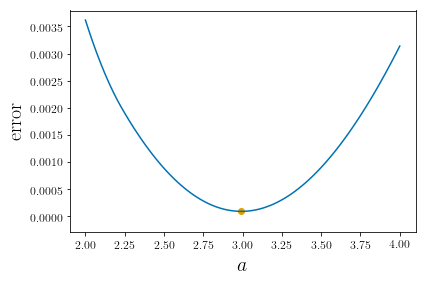

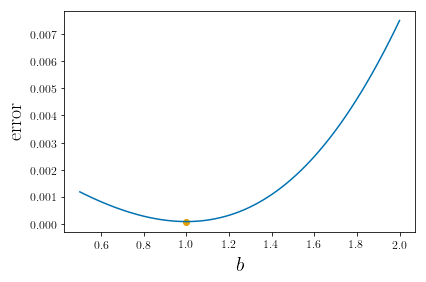

In [19]:
my_model.plot_profiles()

#### Bootstrapping

We use the default 100 repetitions.

**Note:** if you see a "widget not found" message, just ignore it; a progress bar will appear when you run the cell below.

In [20]:
%%time
my_model.bootstrap()


              $a$         $b$
count  100.000000  100.000000
mean     2.992403    0.999996
std      0.009050    0.006274
min      2.972825    0.981182
25%      2.984868    0.995474
50%      2.993448    1.000578
75%      2.998330    1.004162
max      3.010242    1.013952
Wall time: 14.9 s


The summary

In [21]:
my_model.bootstrap_summary

,$a$,$b$
count,100.000000,100.000000
mean,2.992403,0.999996
std,0.009050,0.006274
min,2.972825,0.981182
25%,2.984868,0.995474
50%,2.993448,1.000578
75%,2.998330,1.004162
max,3.010242,1.013952


The raw results

In [22]:
my_model.bootstrap_raw

,$a$,$b$
0,2.983070,0.981182
1,2.996159,0.997135
2,2.987436,0.998808
3,3.010099,1.004451
4,3.005552,1.010845
5,2.979745,0.994750
6,2.972825,0.994856
7,2.985555,0.992073
8,3.006041,1.007574
9,2.997883,0.999661


Visualisation

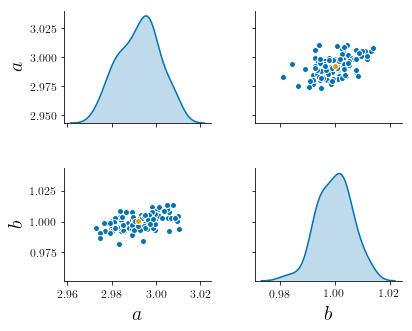

In [23]:
my_model.plot_bootstrap()

### Only one observed variable

Let us suppose now that we only have data for $y$.

In [24]:
df2 = df[df.columns[[0,2]]] # x, which we are ignoring, is column 1 in the data table

df2.head()

,0,2
0,0.060606,0.469672
1,0.060606,0.475169
2,0.060606,0.486987
3,0.070707,0.492719
4,0.070707,0.470383


#### Constructing the `PDEmodel` object.

The inputs are the same as before, except for the data&mdash;now `df2` instead of `df`&mdash;and `obsidx`, which specifies that we only have data for the 2nd variable in the system. Starting from zero, the corresponding index is 1. Since we only have one observed variable, `obsidx` can be either a number or a list of one element.

In [25]:
my_model2 = pde.PDEmodel(df2, LotkaVolterra, [initial_x, initial_y], bounds=[(2, 4), (0.5,2)], 
                         param_names=[r'$a$', r'$b$'], nvars=2, ndims=0, nreplicates=3, obsidx=[1], outfunc=None)

#### Finding the best fit parameters.

In [26]:
%%time
my_model2.fit()

        $a$       $b$
0  2.854213  1.024769
Wall time: 122 ms


In [27]:
my_model2.best_params

,$a$,$b$
0,2.854213,1.024769


In [28]:
my_model2.best_error

9.183109132123787e-05

#### Likelihood profiles

**Note:** if you see a "widget not found" message, just ignore it; a progress bar will appear when you run the cell below.

In [29]:
%%time
my_model2.likelihood_profiles()


Wall time: 22.3 s


The raw results

In [30]:
my_model2.result_profiles

,parameter,value,error
0,$a$,2.000000,0.000102
1,$a$,2.020202,0.000101
2,$a$,2.040404,0.000101
3,$a$,2.060606,0.000100
4,$a$,2.080808,0.000100
5,$a$,2.101010,0.000099
6,$a$,2.121212,0.000099
7,$a$,2.141414,0.000098
8,$a$,2.161616,0.000098
9,$a$,2.181818,0.000097


Visualisation

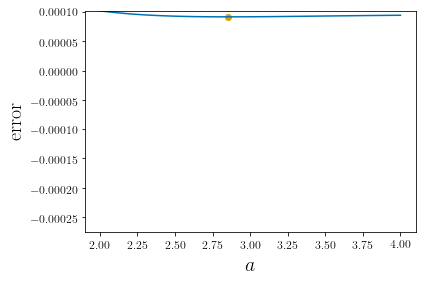

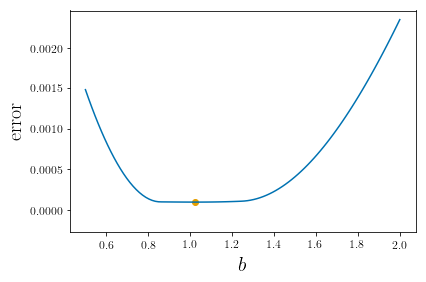

In [31]:
my_model2.plot_profiles()

#### Bootstrapping

**Note:** if you see a "widget not found" message, just ignore it; a progress bar will appear when you run the cell below.

In [32]:
%%time
my_model2.bootstrap()


              $a$         $b$
count  100.000000  100.000000
mean     2.921941    1.019296
std      0.391685    0.068270
min      2.332665    0.853275
25%      2.659627    0.988730
50%      2.855565    1.026572
75%      3.045344    1.068188
max      3.997680    1.141100
Wall time: 11.7 s


The summary

In [33]:
my_model2.bootstrap_summary

,$a$,$b$
count,100.000000,100.000000
mean,2.921941,1.019296
std,0.391685,0.068270
min,2.332665,0.853275
25%,2.659627,0.988730
50%,2.855565,1.026572
75%,3.045344,1.068188
max,3.997680,1.141100


The raw results

In [34]:
my_model2.bootstrap_raw

,$a$,$b$
0,2.688228,1.057967
1,2.597818,1.077157
2,3.480578,0.922850
3,3.446875,0.930440
4,2.717712,1.058320
5,2.544557,1.081170
6,2.524206,1.093958
7,3.756929,0.887203
8,2.663730,1.057020
9,2.878736,1.013985


Visualisation

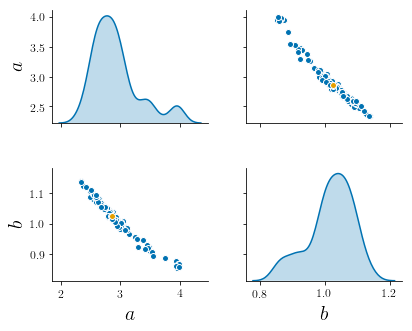

In [35]:
my_model2.plot_bootstrap()

### Only a function of the variables is observed

Finally, we consider the case when it's not the raw outputs of the system that are observed, but rather a function of them. In this case, let us assume that the observed quantity is

$$\mathcal{F}(x, y) = x\,y$$

In [36]:
df3 = df[df.columns[[0]]] # we take only the time-points

# We add the new function
df3[r'$\mathcal{F}$'] = df['1']*df['2'] # x and y are, respectively, columns 1 and 2 in the data table

df3.head()

,0,$\mathcal{F}$
0,0.060606,0.153085
1,0.060606,0.155130
2,0.060606,0.154632
3,0.070707,0.167795
4,0.070707,0.152645


#### Constructing the `PDEmodel` object.

The inputs are the same as before, except for the data&mdash;now `df3`&mdash;and `outfunc`, which specifies the function to be applied to the outputs before computing the error.

In [37]:
def F(z):
    x, y = z
    
    return x*y

In [38]:
my_model3 = pde.PDEmodel(df3, LotkaVolterra, [initial_x, initial_y], bounds=[(2, 4), (0.5,2)], 
                         param_names=[r'$a$', r'$b$'], nvars=2, ndims=0, nreplicates=3, obsidx=None, outfunc=F)

#### Finding the best fit parameters.

In [39]:
%%time
my_model3.fit()

        $a$       $b$
0  3.011332  0.962344
Wall time: 421 ms


In [40]:
my_model3.best_params

,$a$,$b$
0,3.011332,0.962344


In [41]:
my_model3.best_error

4.441449169702758e-05

#### Likelihood profiles

**Note:** if you see a "widget not found" message, just ignore it; a progress bar will appear when you run the cell below.

In [42]:
%%time
my_model3.likelihood_profiles()


Wall time: 1min 1s


The raw results

In [43]:
my_model3.result_profiles

,parameter,value,error
0,$a$,2.000000,0.002442
1,$a$,2.020202,0.002340
2,$a$,2.040404,0.002239
3,$a$,2.060606,0.002140
4,$a$,2.080808,0.002043
5,$a$,2.101010,0.001948
6,$a$,2.121212,0.001854
7,$a$,2.141414,0.001763
8,$a$,2.161616,0.001674
9,$a$,2.181818,0.001587


Visualisation

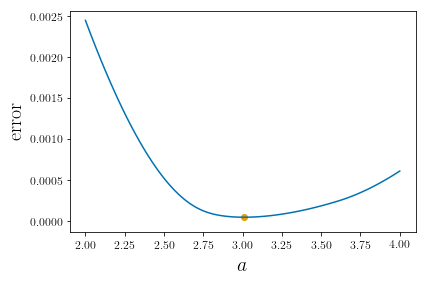

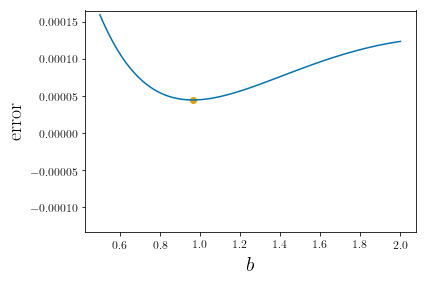

In [44]:
my_model3.plot_profiles()

#### Bootstrapping

**Note:** if you see a "widget not found" message, just ignore it; a progress bar will appear when you run the cell below.

In [45]:
%%time
my_model3.bootstrap()


              $a$         $b$
count  100.000000  100.000000
mean     3.010496    0.962340
std      0.021826    0.035878
min      2.962493    0.846855
25%      2.998047    0.938988
50%      3.011712    0.959632
75%      3.021565    0.987687
max      3.072035    1.039080
Wall time: 24.3 s


The summary

In [46]:
my_model3.bootstrap_summary

,$a$,$b$
count,100.000000,100.000000
mean,3.010496,0.962340
std,0.021826,0.035878
min,2.962493,0.846855
25%,2.998047,0.938988
50%,3.011712,0.959632
75%,3.021565,0.987687
max,3.072035,1.039080


The raw results

In [47]:
my_model3.bootstrap_raw

,$a$,$b$
0,3.005142,0.952657
1,3.013850,1.004572
2,3.020961,0.978940
3,2.983119,1.027271
4,3.009114,0.959428
5,3.018758,0.953989
6,3.013143,0.997037
7,3.042316,0.906960
8,3.026899,0.937291
9,3.072035,0.846855


Visualisation

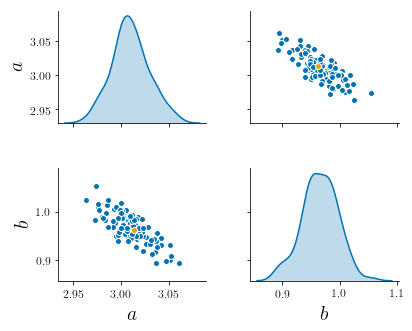

In [42]:
my_model3.plot_bootstrap()